In [1]:
import pandas as pd

rating_details=pd.read_csv('C:/Users/Admin1/Desktop/ml-25m/ratings.csv')
rating_details.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [2]:
movie_details=pd.read_csv('C:/Users/Admin1/Desktop/ml-25m/movies.csv')
movie_details.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
rating_details.shape

(25000095, 4)

In [4]:
rating_details.describe


<bound method NDFrame.describe of           userId  movieId  rating   timestamp
0              1      296     5.0  1147880044
1              1      306     3.5  1147868817
2              1      307     5.0  1147868828
3              1      665     5.0  1147878820
4              1      899     3.5  1147868510
...          ...      ...     ...         ...
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

[25000095 rows x 4 columns]>

In [5]:
movie_details.info

<bound method DataFrame.info of        movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
.

In [6]:
dataset=pd.merge(rating_details,movie_details,on='movieId')
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [7]:
import datetime
from datetime import datetime,date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [9]:
dataset.shape

(25000095, 7)

In [8]:
dataset.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


# Average ratings

In [9]:
a=dataset
a=a.groupby('title')['rating'].mean()
a

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.896648
#1 Cheerleader Camp (2010)                                 2.111111
#Captured (2017)                                           3.750000
#Female Pleasure (2018)                                    3.666667
                                                             ...   
…And the Fifth Horseman Is Fear (1965)                     3.250000
キサラギ (2007)                                                3.250000
チェブラーシカ (2010)                                             3.166667
貞子3D (2012)                                                2.375000
줄탁동시 (2012)                                                4.000000
Name: rating, Length: 58958, dtype: float64

In [10]:
sorted_ratings_wise_movie=a.sort_values(ascending=False)

In [11]:
sorted_ratings_wise_movie

title
From Here To Eternity: The Musical (2014)    5.0
Tainted Blood (1993)                         5.0
Look at Me (2012)                            5.0
My Christmas Prince (2017)                   5.0
You Must Be Joking (2014)                    5.0
                                            ... 
Le nozze di Laura (2015)                     0.5
Kill Squad (1982)                            0.5
Special Delivery (2008)                      0.5
Burning Down the House (2001)                0.5
Mr. Rossi Looks for Happiness (1976)         0.5
Name: rating, Length: 58958, dtype: float64

Total number of ratings for a particular movie

In [12]:
b=dataset.groupby('title')['rating'].count()
b.head(5)

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)      1
"Great Performances" Cats (1998)                           179
#1 Cheerleader Camp (2010)                                   9
#Captured (2017)                                             2
#Female Pleasure (2018)                                      3
Name: rating, dtype: int64

In [13]:
#making a new dataframe
new_record=pd.DataFrame()
new_record['Average_ratings']=a
a

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.896648
#1 Cheerleader Camp (2010)                                 2.111111
#Captured (2017)                                           3.750000
#Female Pleasure (2018)                                    3.666667
                                                             ...   
…And the Fifth Horseman Is Fear (1965)                     3.250000
キサラギ (2007)                                                3.250000
チェブラーシカ (2010)                                             3.166667
貞子3D (2012)                                                2.375000
줄탁동시 (2012)                                                4.000000
Name: rating, Length: 58958, dtype: float64

In [14]:
new_record['Count of total ratings']=b
new_record.head()

,Average_ratings,Count of total ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


In [15]:
#importing data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
%matplotlib inline

In [16]:
new_record.columns

Index(['Average_ratings', 'Count of total ratings'], dtype='object')

<AxesSubplot:>

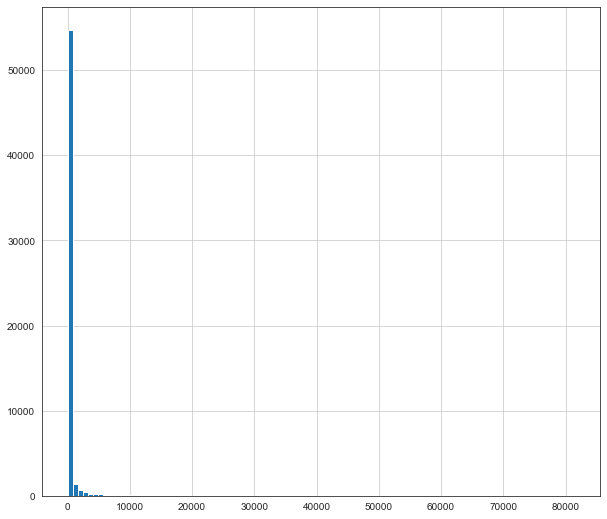

In [17]:
#plot graph of 'num of ratings column'
plt.figure(figsize=(10,9))
new_record['Count of total ratings'].hist(bins=100)

from the output ,you can see that most of the movies have received less than 50 ratings.while no of movies having more than 100 ratings is very low.

<AxesSubplot:>

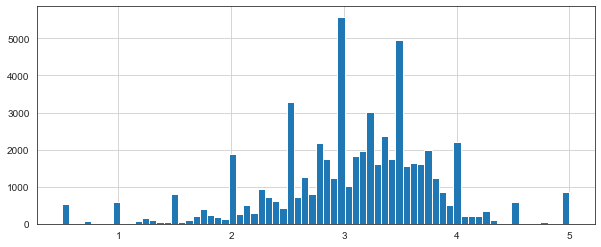

In [18]:
#plot the graph of ratings columns
plt.figure(figsize=(10,4))
new_record['Average_ratings'].hist(bins=70)

<Figure size 576x432 with 0 Axes>

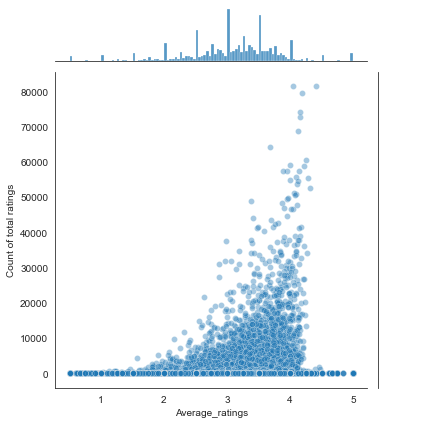

In [19]:
plt.figure(figsize=(8,6))
sns.jointplot(x='Average_ratings',y='Count of total ratings',data=new_record, alpha=0.4)

The graph shows that,in general,movies with higher average ratings actually have more number of ratings,compared with movies
that have lower average ratings.

AttributeError: 'DataFrame' object has no attribute 'sort'